# Practice Session 07: Connected components and k-core decomposition

<font size="+2" color="blue">Additional results: multiple experiments per graph</font>

**Name:** Telmo Linacisoro

**NIA:** 253251

**Date:** 13/11/2024



# 1. The Star Wars graph

In [1]:
import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics
!pip install powerlaw
import powerlaw

In [2]:
INPUT_GRAPH_FILENAME = "starwars.graphml"

In [3]:
# LEAVE AS-IS

# Read the graph in GraphML format
g_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
g_relabeled = nx.relabel.relabel_nodes(g_in, dict(g_in.nodes(data='name')))

# Convert the graph to undirected
g = g_relabeled.to_undirected()

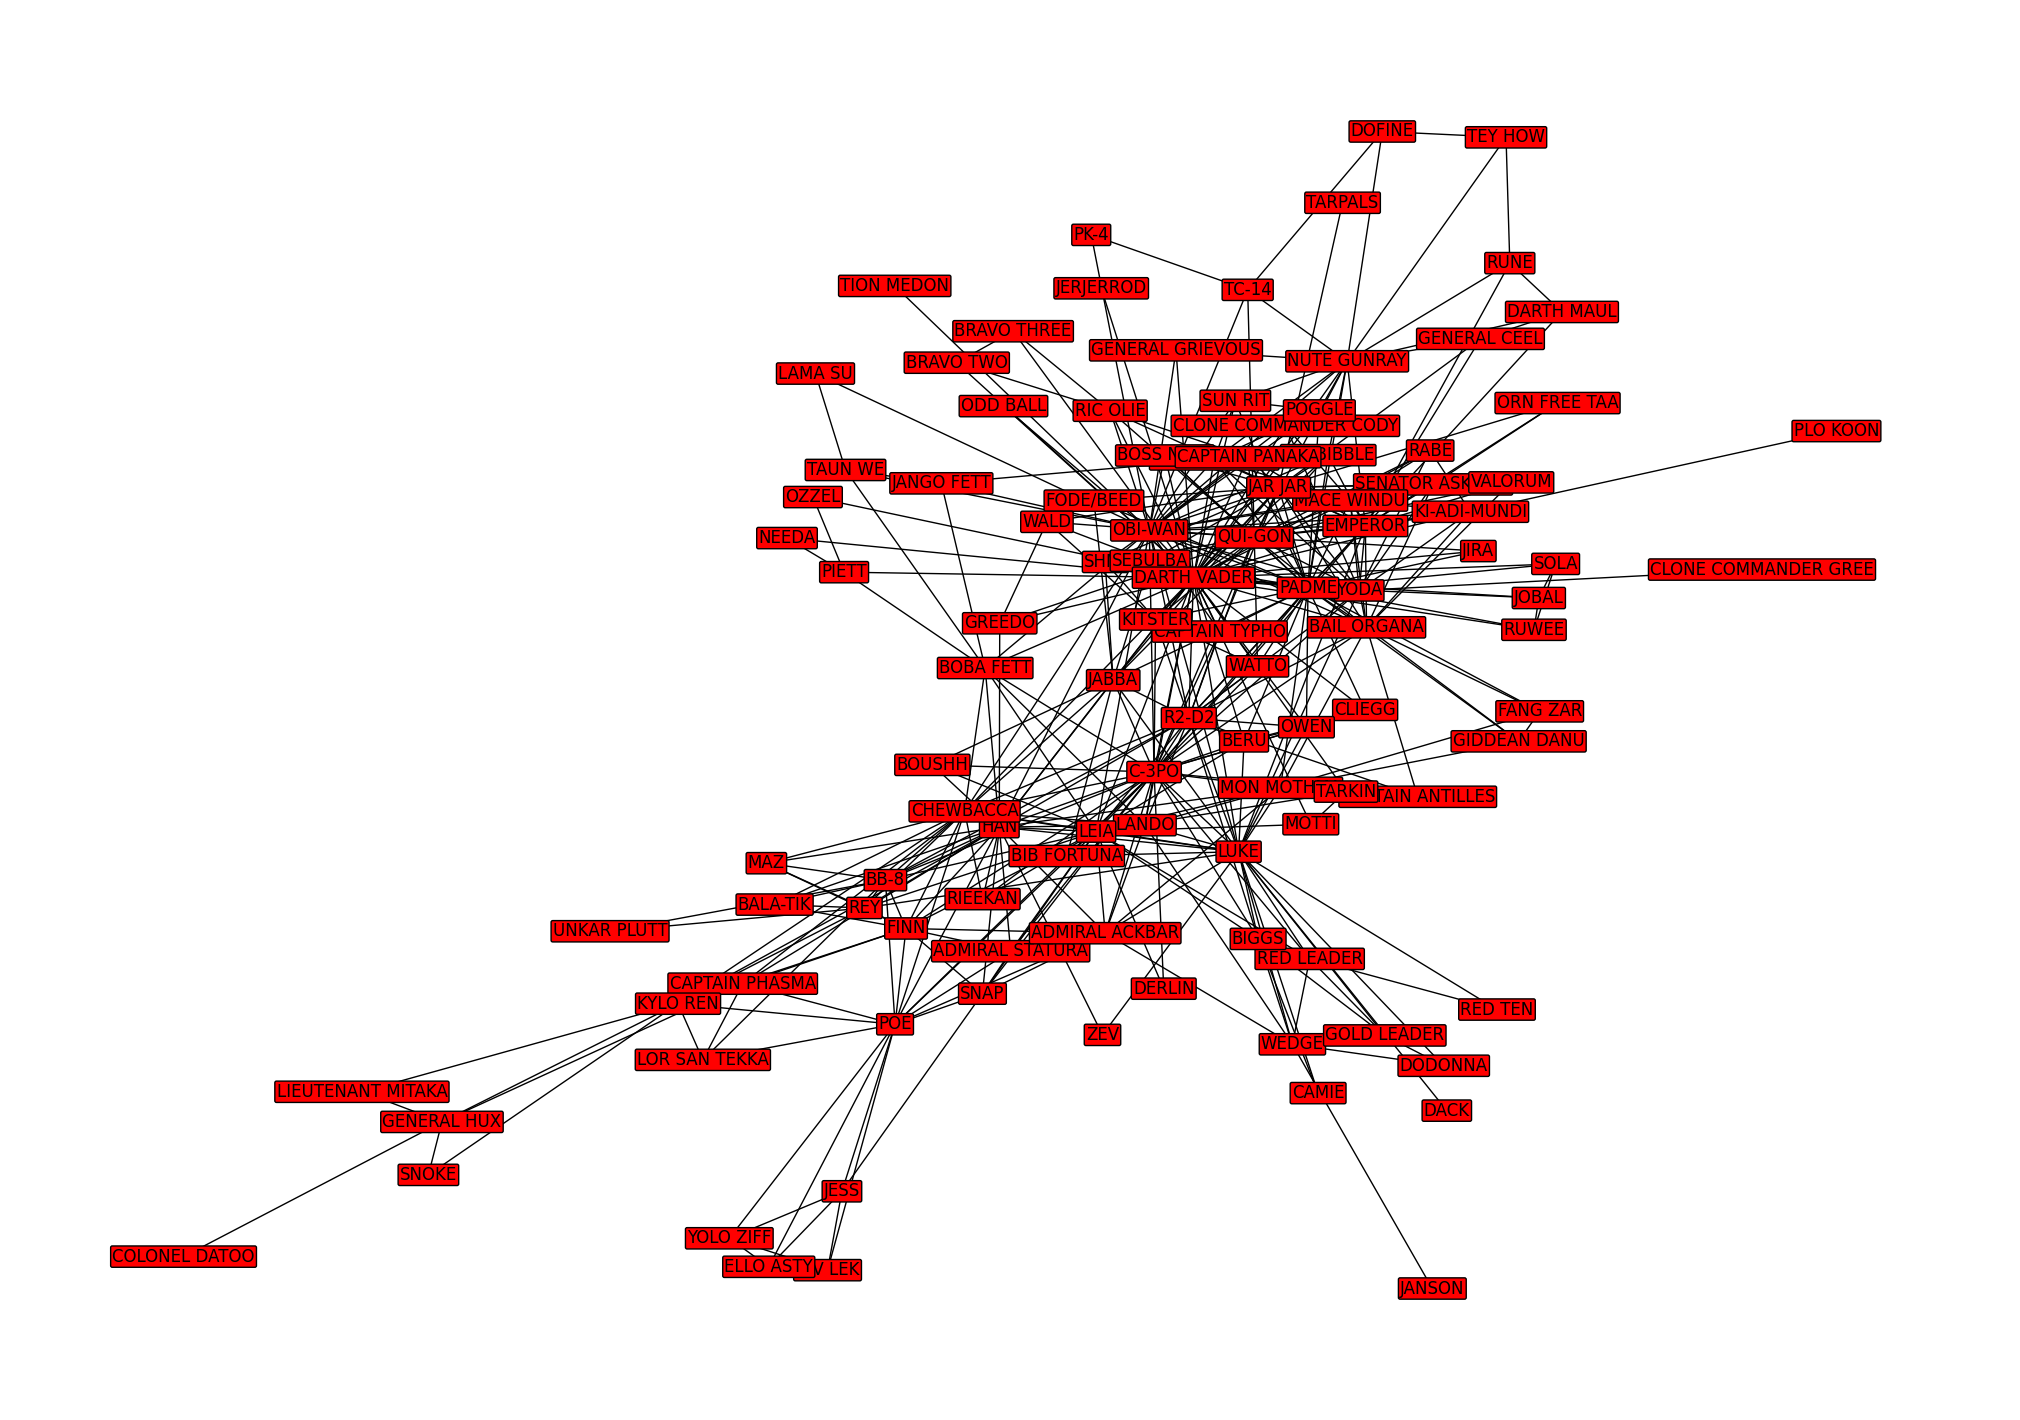

In [4]:
# LEAVE AS-IS (OR MODIFY IF YOU WANT)

def plot_graph(g):

    # Create a plot of 20x14
    plt.figure(figsize=(20,14))

    # Layout the nodes using a spring model
    nx.draw_spring(g, with_labels=True, node_size=1, bbox=dict(facecolor="red", edgecolor='black', boxstyle='round,pad=0.1'))

    # Display
    plt.show()

plot_graph(g)

<font size="+1" color="red">**Is this a connected graph? Why or why not?**

<font color='red'>Yes, it is a connected graph because there is a path between every pair of nodes.

In [5]:
# Node degrees list
degrees = [degree for _, degree in g.degree()]

mean_degree = np.mean(degrees)
max_degree = np.max(degrees)
std_dev_degree = np.std(degrees)
mode_degree = statistics.mode(degrees)

print(f"Mean degree: {mean_degree}")
print(f"Max degree: {max_degree}")
print(f"Standard deviation of degrees: {std_dev_degree}")
print(f"Mode of degrees: {mode_degree}")

Mean degree: 8.072727272727272
Max degree: 52
Standard deviation of degrees: 8.642084229785704
Mode of degrees: 4


In [6]:
average_degree = round(np.mean(degrees), 1)
std_dev_degree = round(np.std(degrees), 1)

print(f"Average degree: {average_degree}")
print(f"Standard deviation of degrees: {std_dev_degree}")

Average degree: 8.1
Standard deviation of degrees: 8.6


<font size="+1" color="red">**Is this a scale-free network? Why or why not?**</font>

<font color='red'>To check whether the network is scale-free, we can analyze the degree distribution and if it follows a power law. Therefore, the following log-log plot of the degree distribution should be linear, which, in this case, it is, plus we get good values for the log-likelihood and the p-value. So, the network is scale-free.

Calculating best minimal value for power law fit


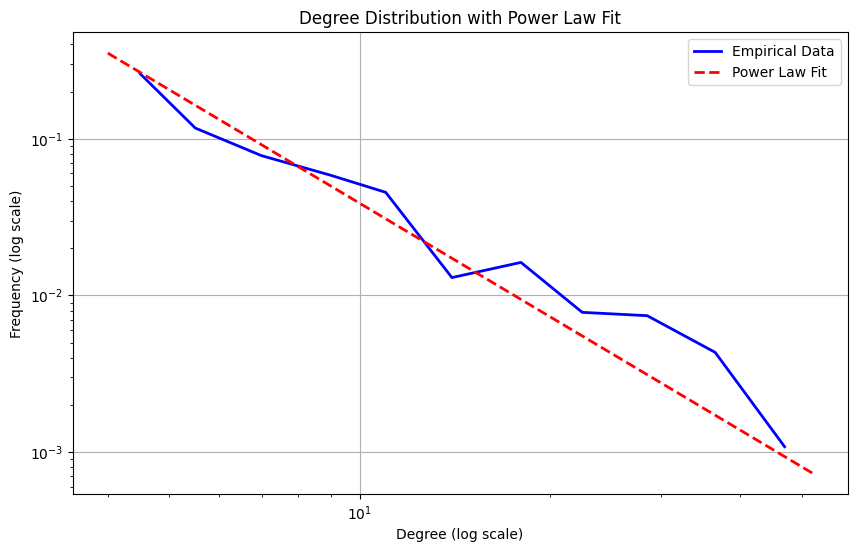

Log-likelihood ratio (R): 10.164111538096385
p-value: 0.04748568105372792


In [7]:
fit = powerlaw.Fit(degrees)

# Degree distribution with power law fit
plt.figure(figsize=(10, 6))

# Empirical data
fit.plot_pdf(color='blue', linewidth=2, label='Empirical Data')

# Power law fit
fit.power_law.plot_pdf(color='red', linestyle='--', linewidth=2, label='Power Law Fit')

plt.xlabel("Degree (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.title("Degree Distribution with Power Law Fit")
plt.grid(True)
plt.show()

# Power law evaluation
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Log-likelihood ratio (R): {R}")
print(f"p-value: {p}")

# 2. Remove a fraction of edges

In [8]:
# LEAVE AS-IS

def remove_edges_uniformly_at_random(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError

    # Create a copy of the input graph
    g_out = g_in.copy()

    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:

        # Remove one random edge
        edge = random.choice(list(g_out.edges()))

        if g_out.has_edge(edge[0], edge[1]):
            g_out.remove_edge(edge[0], edge[1])

    # Return the resulting graph
    return g_out

<font size="+1" color="red">Replace this cell with code to create g15, g50, g85 as described above, and to plot these three graphs. Use three different cells for the plots. *Tip: g85, should be keeping 85% of the edges.* </font>

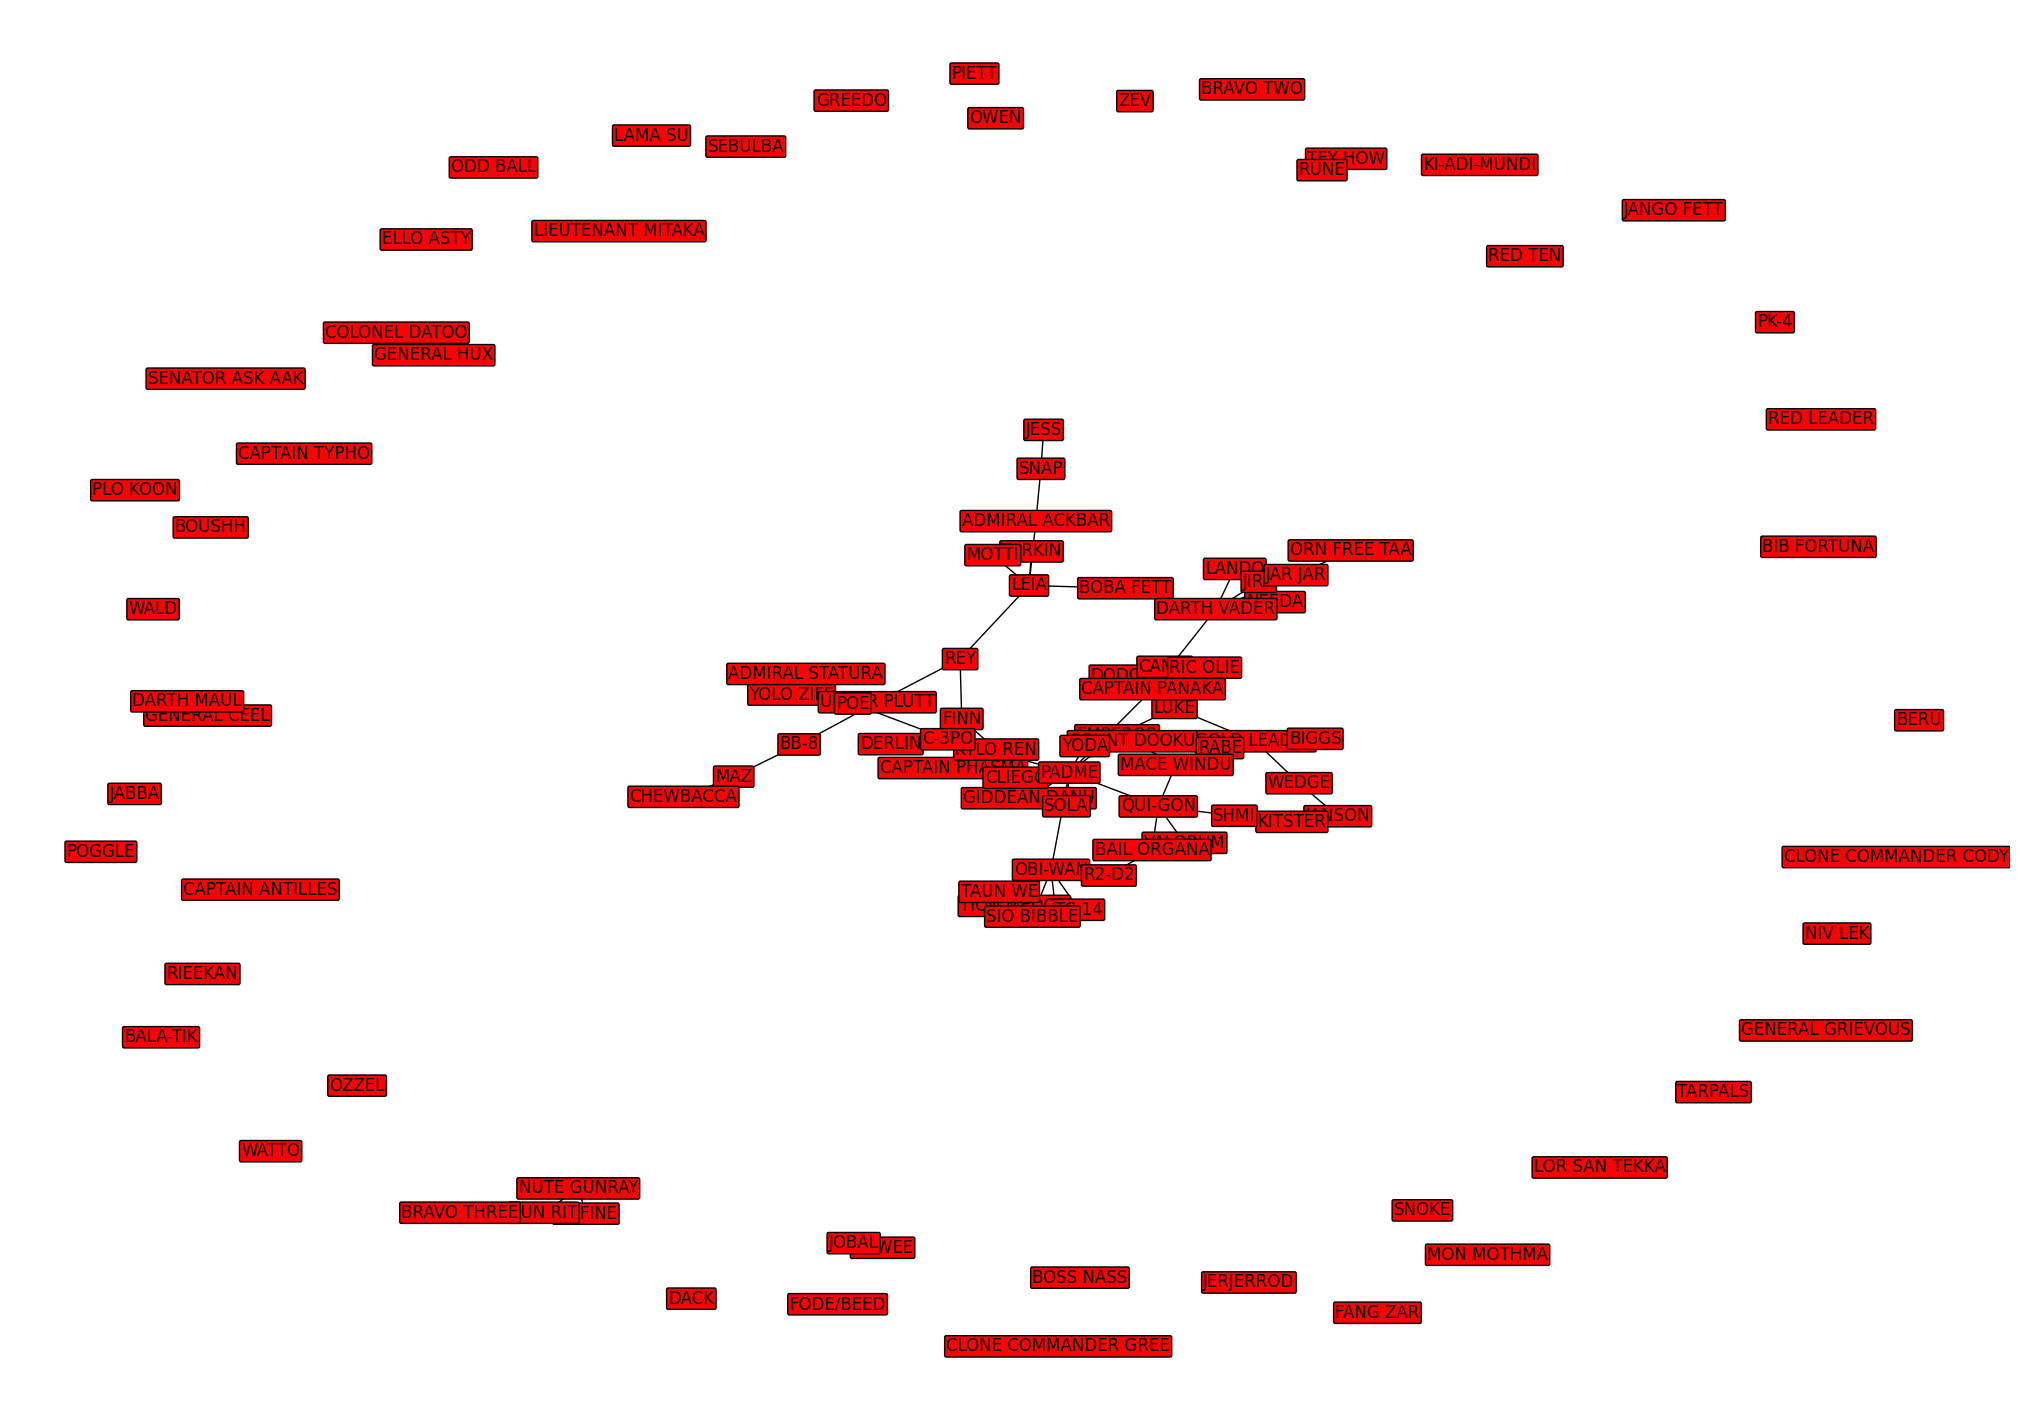

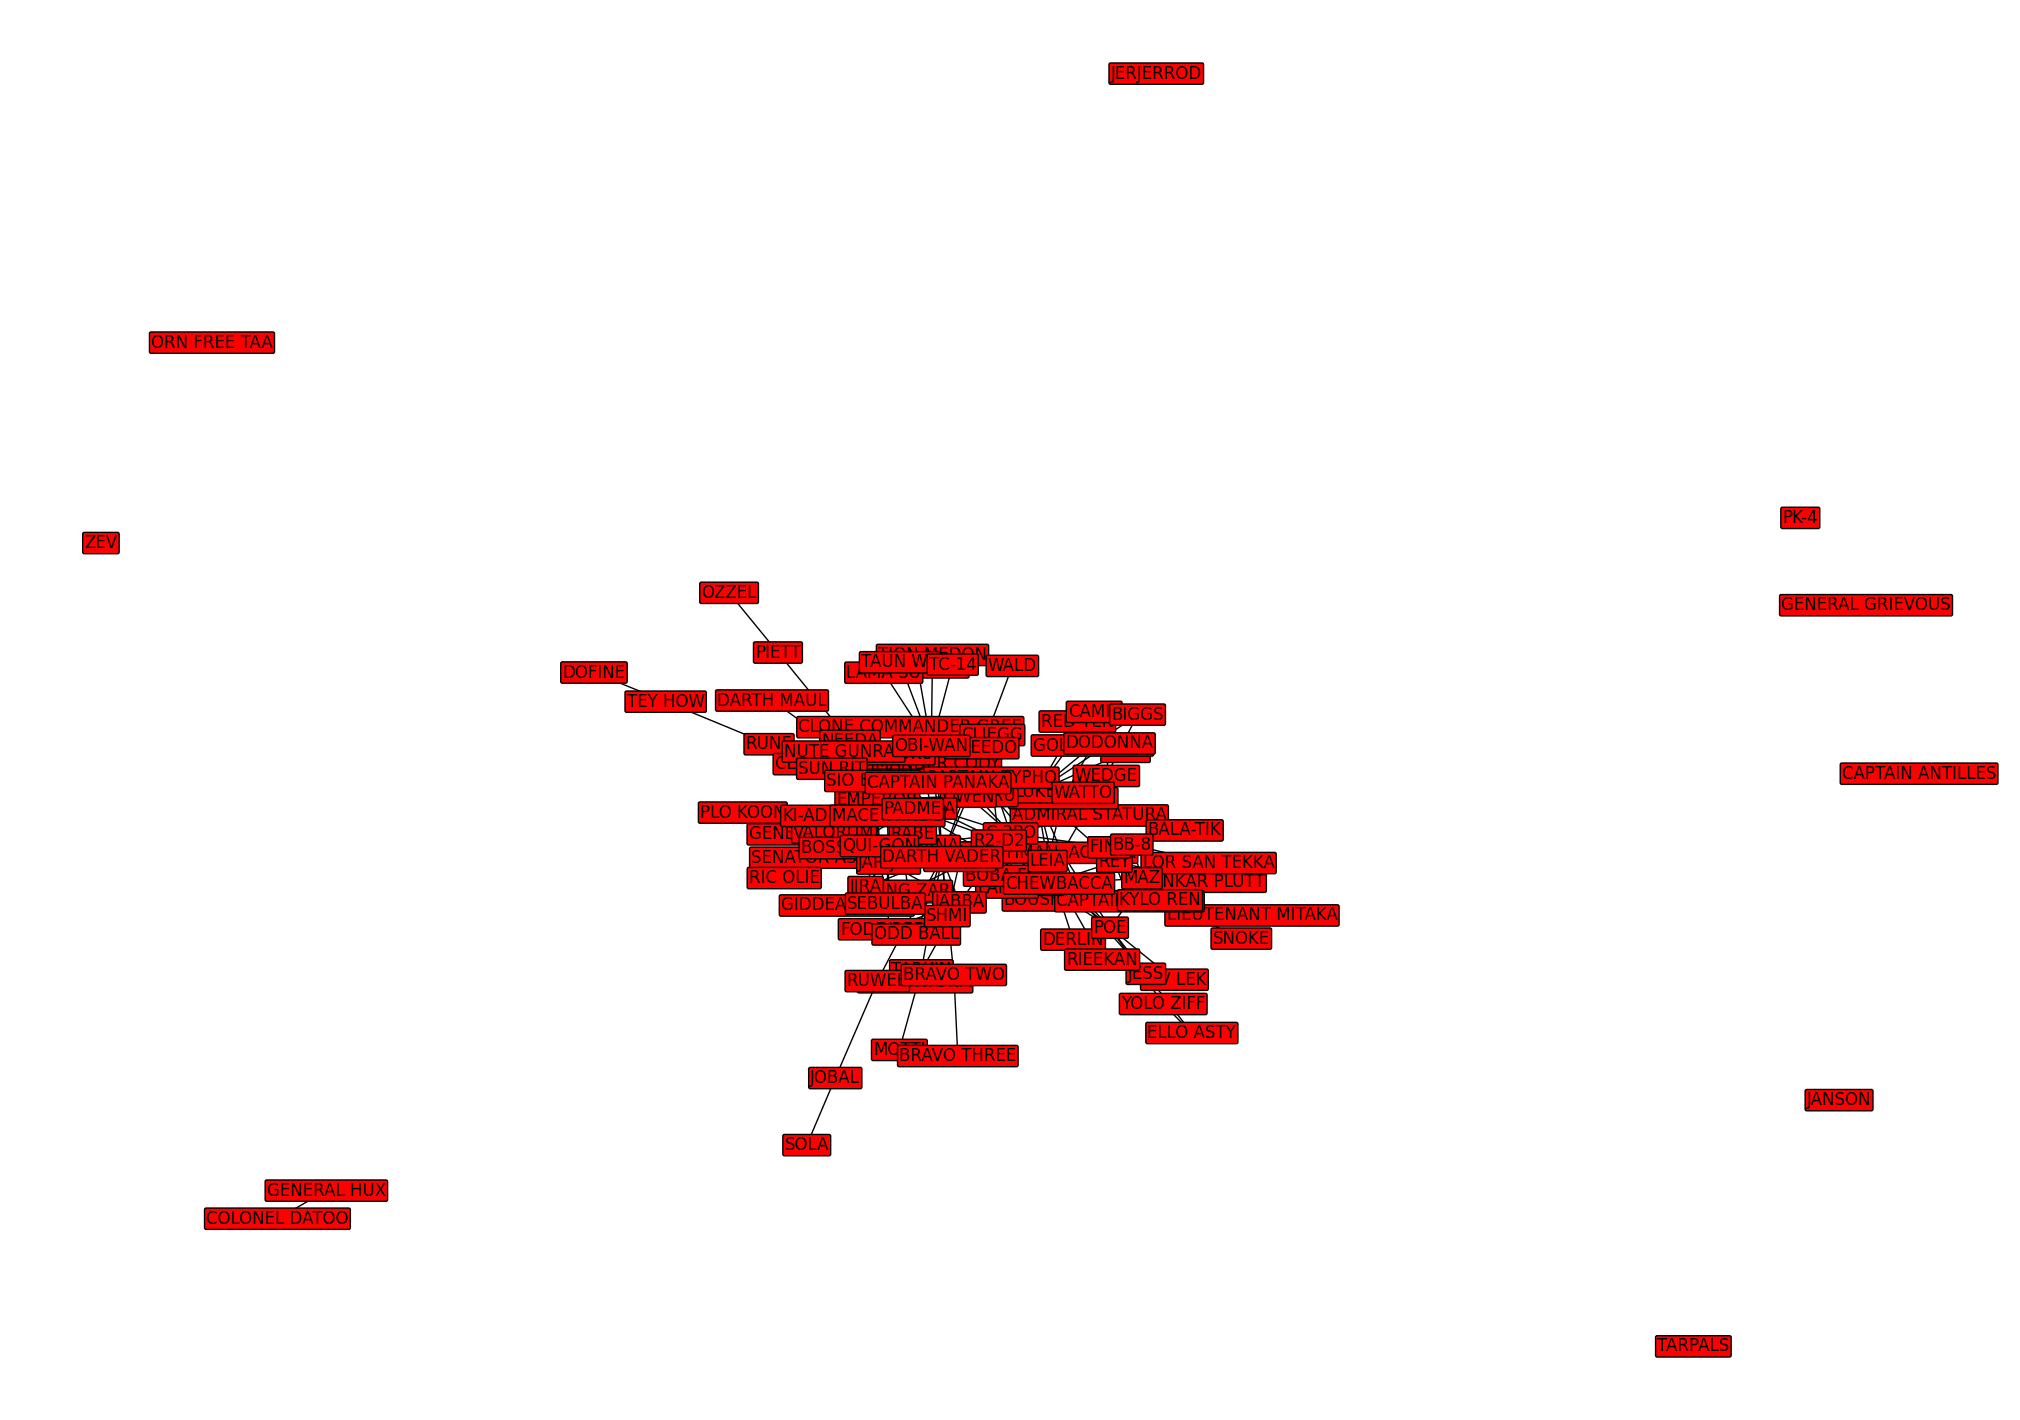

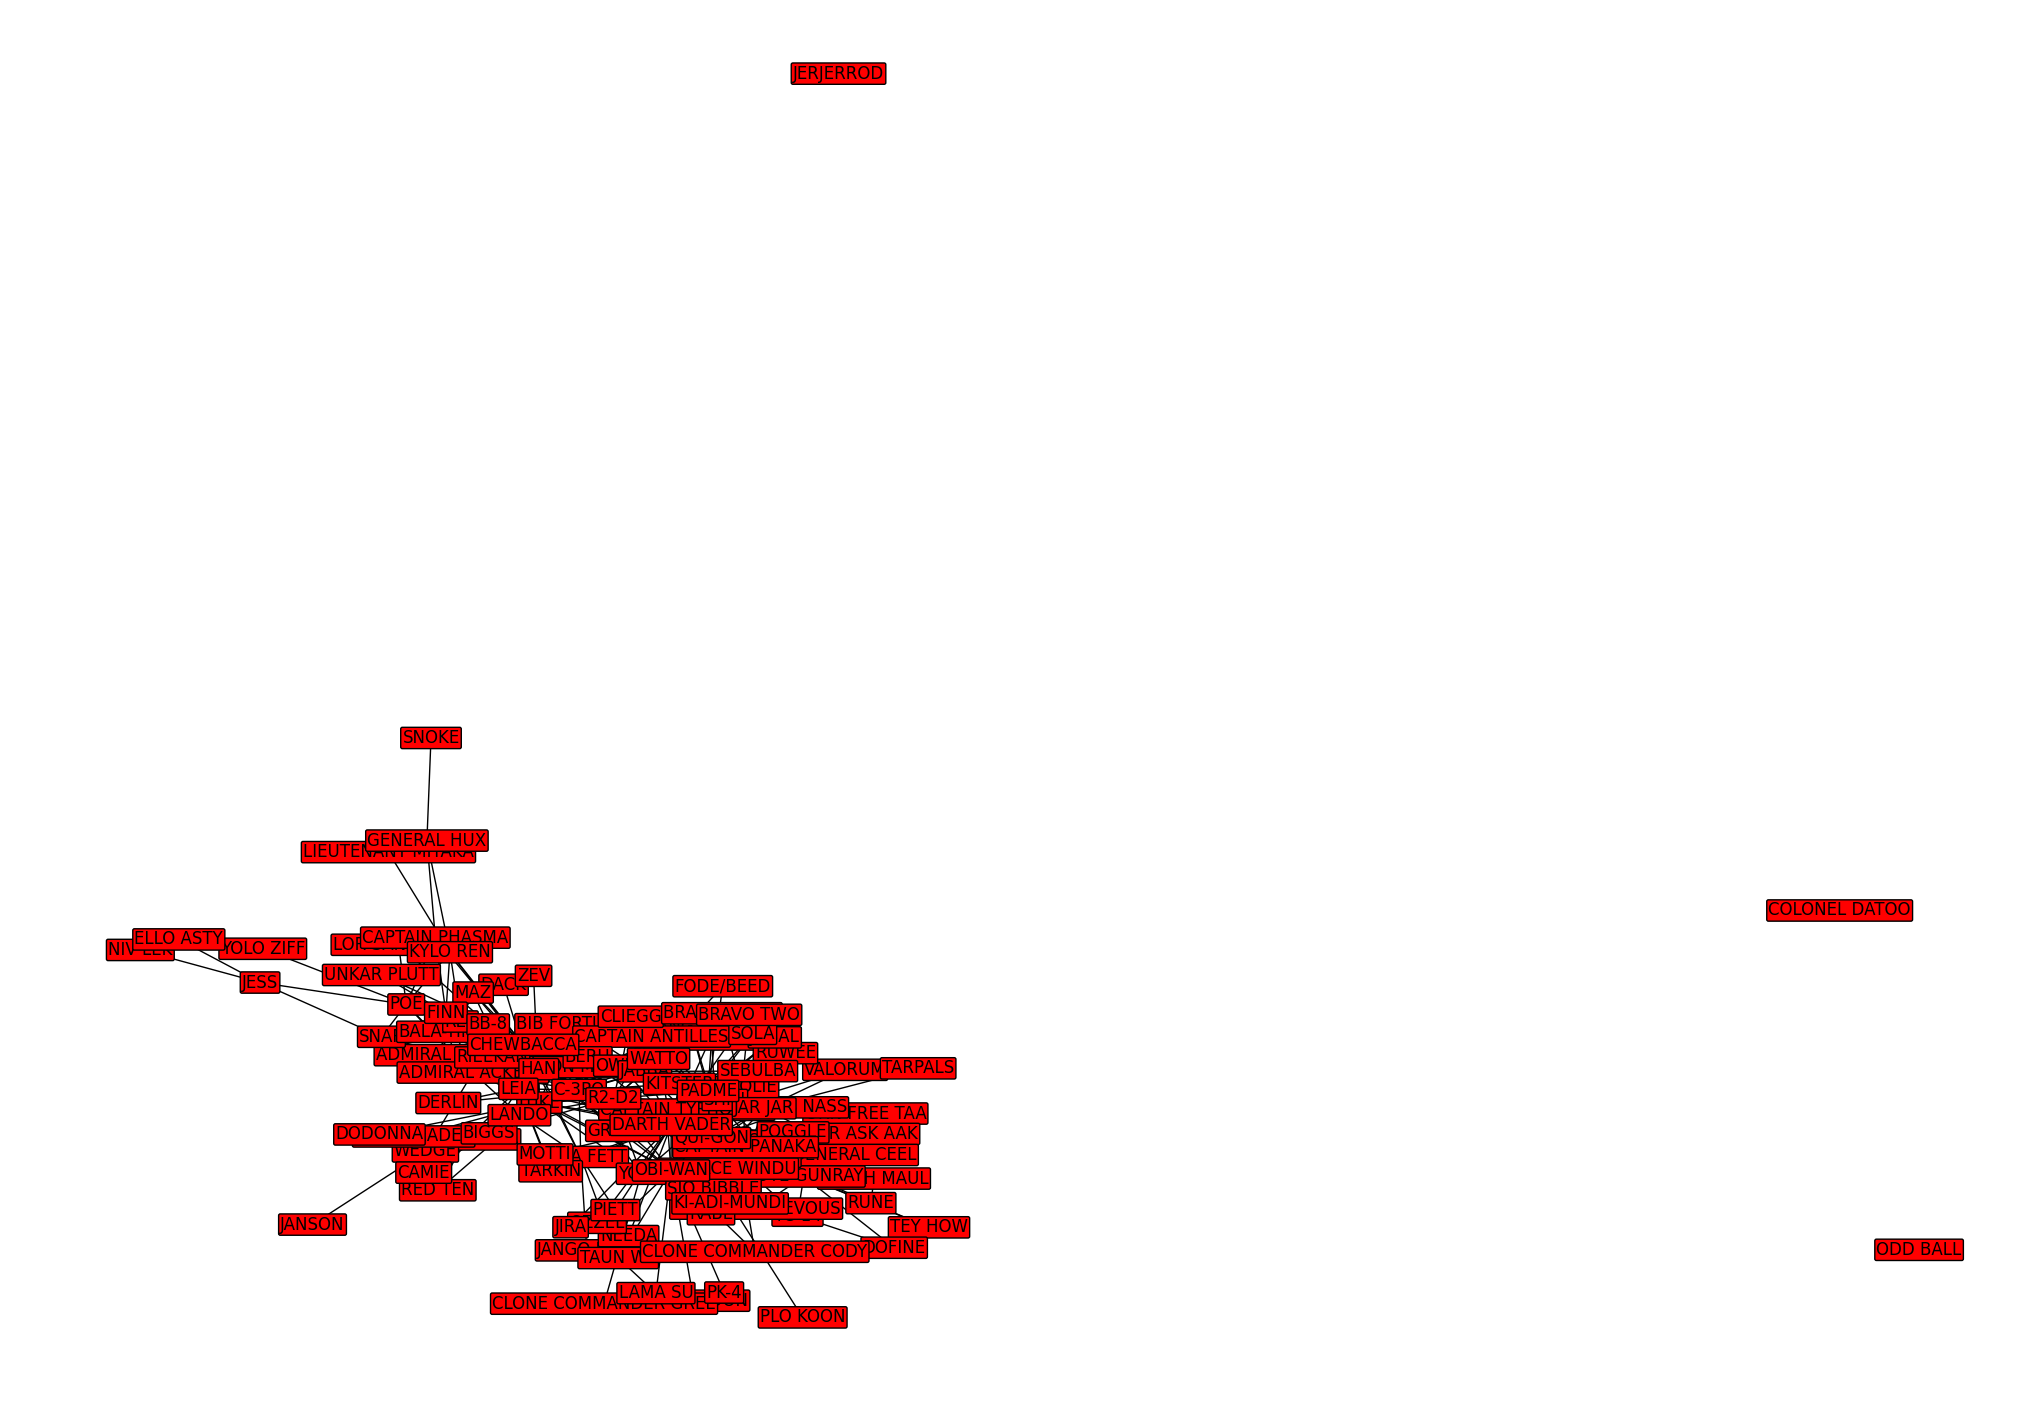

In [9]:
g15 = remove_edges_uniformly_at_random(g, 0.85)
g50 = remove_edges_uniformly_at_random(g, 0.5)
g85 = remove_edges_uniformly_at_random(g, 0.15)

plot_graph(g15)
plot_graph(g50)
plot_graph(g85)

<font size="+1" color="red">**Brief commentary on the connected components, singletons, and the size of the largest connected components.**</font>

<font size="+1" color="red">From right to left, as we progressively remove more edges, the network becomes less connected. The original graph is connected, so with fewer edges removed, the structure will be more or less similar. However, as more edges are removed, the network fragments. Following a similar reasoning, the number of singletons increase as the graph becomes more disconnected, and the size of the largest connected component decreases.

In [10]:
# LEAVE AS-IS

def remove_edges_by_betweenness(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError

    # Create a copy of the input graph
    g_out = g_in.copy()

    # Compute edge betweenness
    #edge_betweenness = nx.algorithms.centrality.edge_betweenness(g_out)
    edge_betweenness = nx.edge_betweenness_centrality(g_out)
    edges_by_betweenness = sorted(edge_betweenness.items(), key=lambda x:x[1], reverse=True)

    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:

        to_remove = edges_by_betweenness.pop(0)
        edge_to_remove = to_remove[0]

        g_out.remove_edge(edge_to_remove[0], edge_to_remove[1])

    # Return the resulting graph
    return g_out

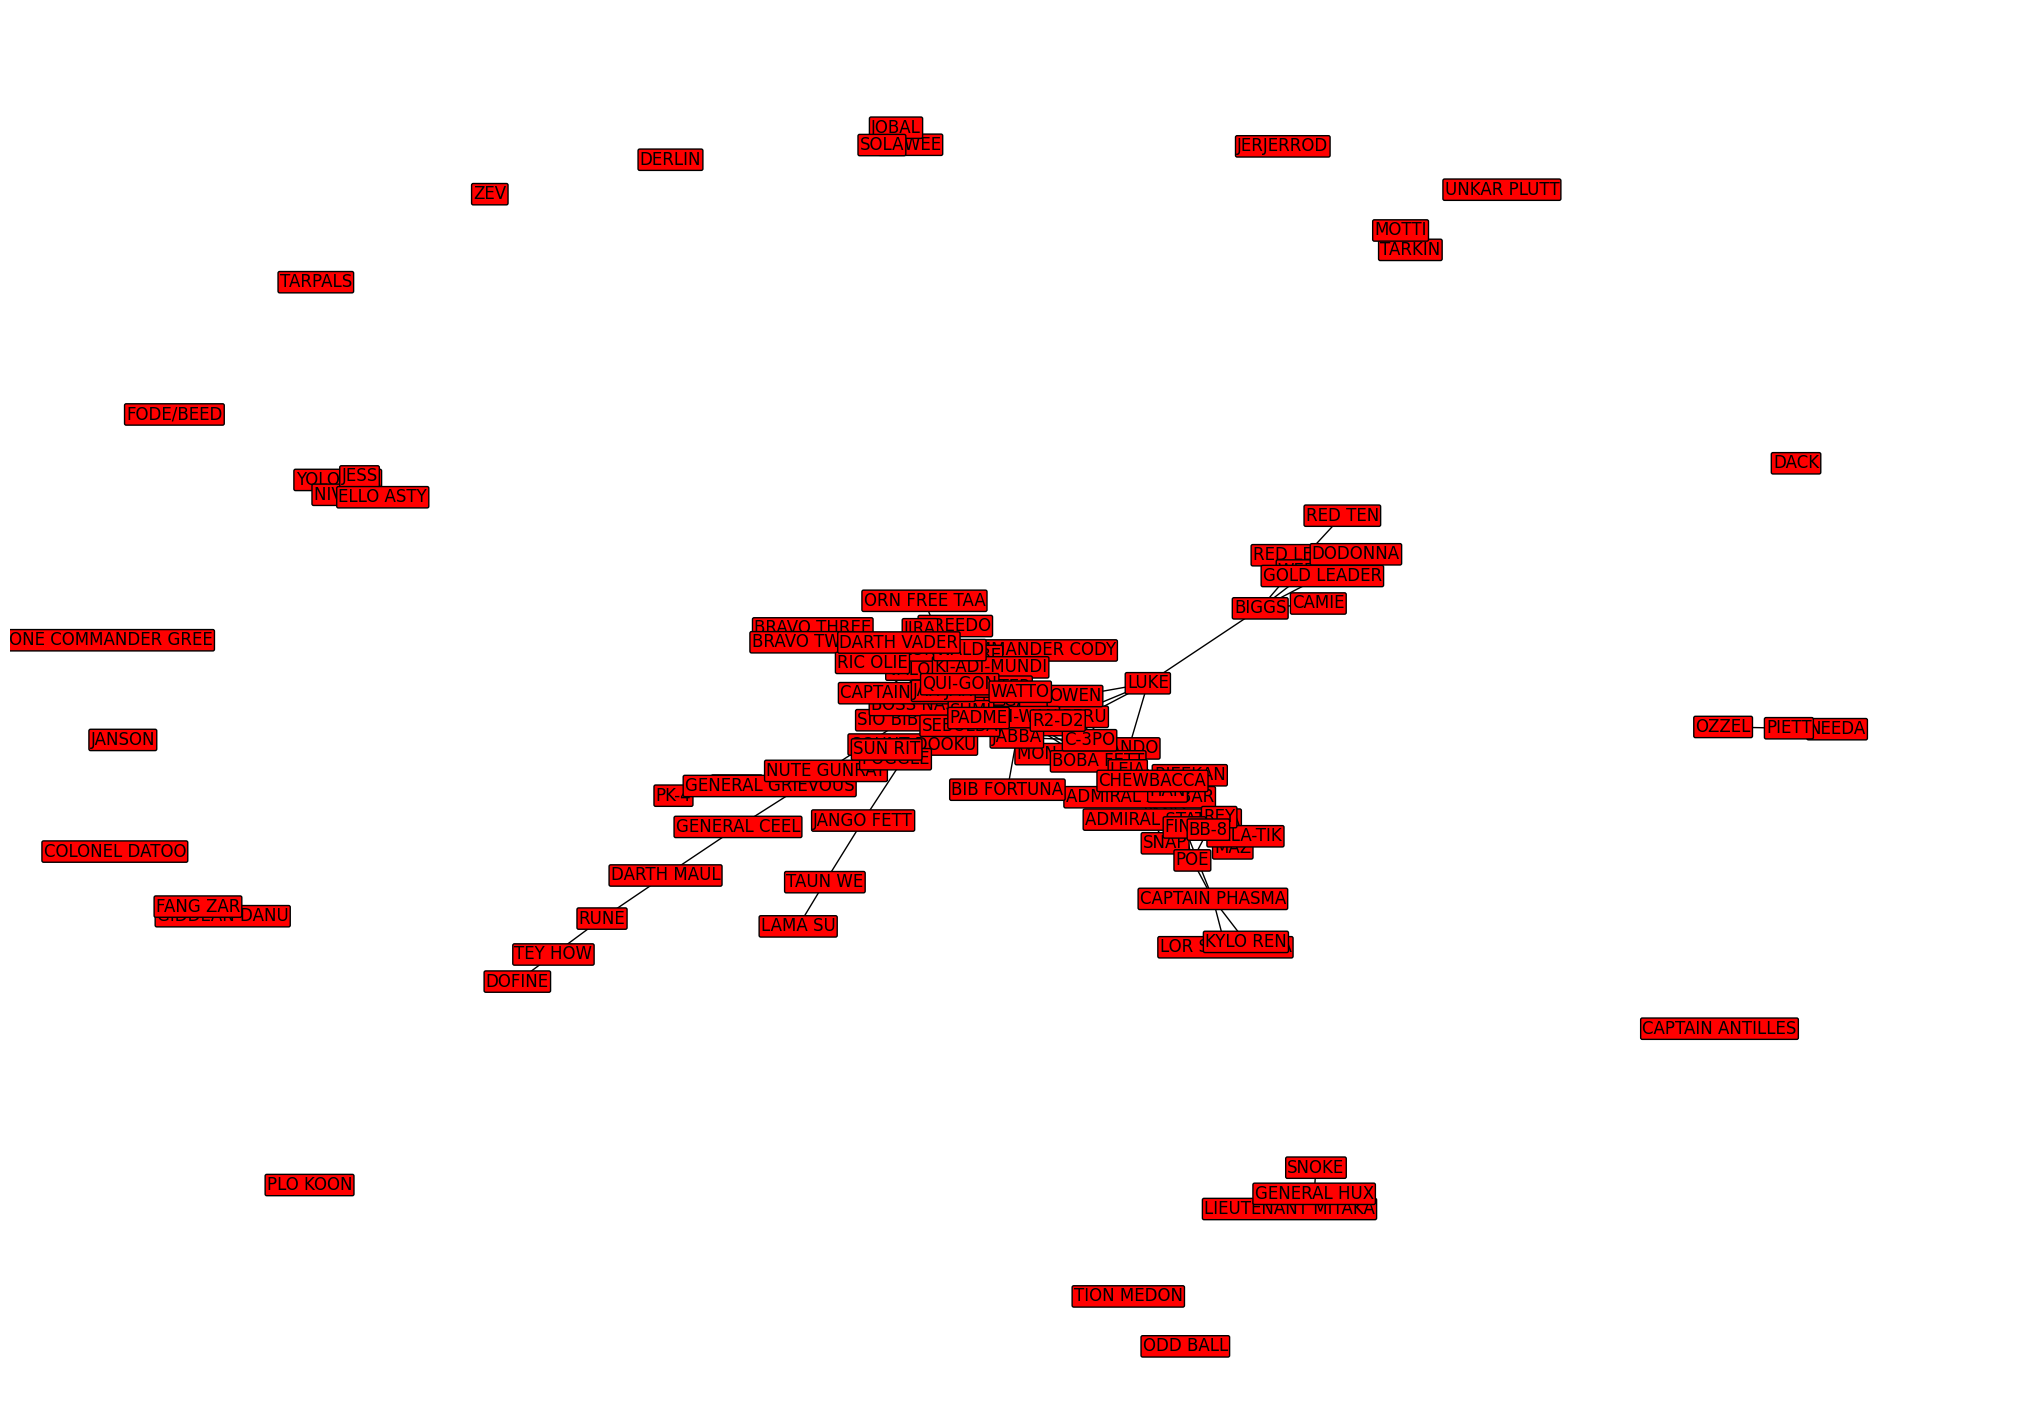

In [11]:
# LEAVE AS-IS

g50b = remove_edges_by_betweenness(g, 0.50)
plot_graph(g50b)

<font size="+1" color="red">**Brief commentary in comparison with the graph in which 50% of the edges were removed uniformly at random.**</font>

<font color="red">When we remove edges by betweenness centrality, the graph becomes more fragmented compared to when they are removed uniformly at random. This is because edges with high betweenness centrality connect important parts of the network, that is they act as bridges between different clusters. Removing these breaks the network's connectivity more strongly, making the number of disconnected components larger. And, on the contrary, removing the edges uniformly tends removes edges more evenly, making the change to the overall structure not so big.

# 3. Number of connected components

In [12]:
def assign_component_recursive(g, node2componentid, starting_node, component_id):
    node2componentid[starting_node] = component_id
    for neighbor in g.neighbors(starting_node):
        if neighbor not in node2componentid:
            assign_component_recursive(g, node2componentid, neighbor, component_id)

In [13]:
def assign_component(g):
    node2componentid = {}
    component_id = 1
    for node in g.nodes():
        # If the node has not been assigned an ID
        if node not in node2componentid:
            # Use assign_component_recursive to assign an ID to it
            assign_component_recursive(g, node2componentid, node, component_id)
            # And increment the ID for the next component
            component_id += 1
    return node2componentid

In [14]:
# LEAVE AS-IS

def count_connected_components(g):
    # Call the function to assign each node to a connected component
    node2componentid = assign_component(g)

    # Count the number of distinct values in this assignment
    return len(set(node2componentid.values()))

In [15]:
# LEAVE AS-IS

def generate_graphs_by_removing_edges(graph, method):
    ncomponents_after_reducing = {}
    for p in np.arange(0.0, 1.02, 0.02):
        print("- {:.0f}% of the nodes".format(p*100))
        reduced_graph = method(graph, p)
        ncomponents_after_reducing[p] = count_connected_components(reduced_graph)
    return ncomponents_after_reducing

print("Generating graphs by removing edges uniformly at random")
components_removing_uniformly_at_random = generate_graphs_by_removing_edges(g, remove_edges_uniformly_at_random)

print("Generating graphs by removing edges by betweenness")
components_removing_by_betweenness = generate_graphs_by_removing_edges(g, remove_edges_by_betweenness)

Generating graphs by removing edges uniformly at random
- 0% of the nodes
- 2% of the nodes
- 4% of the nodes
- 6% of the nodes
- 8% of the nodes
- 10% of the nodes
- 12% of the nodes
- 14% of the nodes
- 16% of the nodes
- 18% of the nodes
- 20% of the nodes
- 22% of the nodes
- 24% of the nodes
- 26% of the nodes
- 28% of the nodes
- 30% of the nodes
- 32% of the nodes
- 34% of the nodes
- 36% of the nodes
- 38% of the nodes
- 40% of the nodes
- 42% of the nodes
- 44% of the nodes
- 46% of the nodes
- 48% of the nodes
- 50% of the nodes
- 52% of the nodes
- 54% of the nodes
- 56% of the nodes
- 58% of the nodes
- 60% of the nodes
- 62% of the nodes
- 64% of the nodes
- 66% of the nodes
- 68% of the nodes
- 70% of the nodes
- 72% of the nodes
- 74% of the nodes
- 76% of the nodes
- 78% of the nodes
- 80% of the nodes
- 82% of the nodes
- 84% of the nodes
- 86% of the nodes
- 88% of the nodes
- 90% of the nodes
- 92% of the nodes
- 94% of the nodes
- 96% of the nodes
- 98% of the nodes

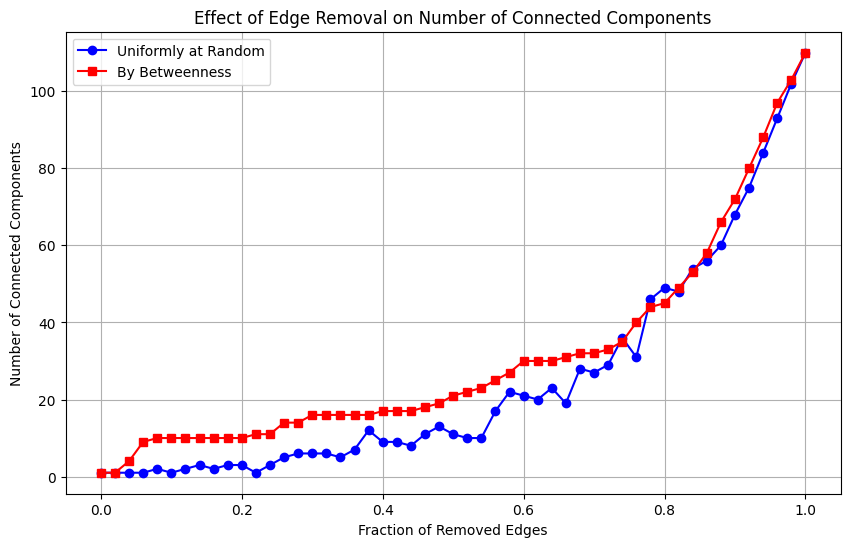

In [16]:
x_vals_uniform = sorted(components_removing_uniformly_at_random.keys())
y_vals_uniform = [components_removing_uniformly_at_random[x] for x in x_vals_uniform]

x_vals_betweenness = sorted(components_removing_by_betweenness.keys())
y_vals_betweenness = [components_removing_by_betweenness[x] for x in x_vals_betweenness]

plt.figure(figsize=(10, 6))
plt.plot(x_vals_uniform, y_vals_uniform, label="Uniformly at Random", color="blue", marker='o')
plt.plot(x_vals_betweenness, y_vals_betweenness, label="By Betweenness", color="red", marker='s')

plt.xlabel("Fraction of Removed Edges")
plt.ylabel("Number of Connected Components")
plt.title("Effect of Edge Removal on Number of Connected Components")

plt.legend()
plt.grid(True)
plt.show()

<font size="+1" color="red">**Do you see a linear trend, or something else? Why is 100% of removal the maximum amount of connected components?**</font>

<font color="red">The trend is not linear, but we can observe that as the fraction of removed edges increases, the number of connected components also increases, with a point where the growth becomes faster. We can also see some differences between the lines. For the betweenness removal, the number of connected components is generally higher than for uniform removal, which is because of the removal of more important "bridges", as discussed earlier. And regarding the 100% removal, the number of connected components reaches its maximum because, once all edges are removed, that is the graph becomes entirely disconnected, with each node becoming its own component (a singleton).

# 4. Largest connected component

In [17]:
def size_largest_connected_component(g):
    node2componentid = assign_component(g)
    component_sizes = {}
    for component_id in node2componentid.values():
        if component_id in component_sizes:
            component_sizes[component_id] += 1
        else:
            component_sizes[component_id] = 1
    return np.max(list(component_sizes.values()))

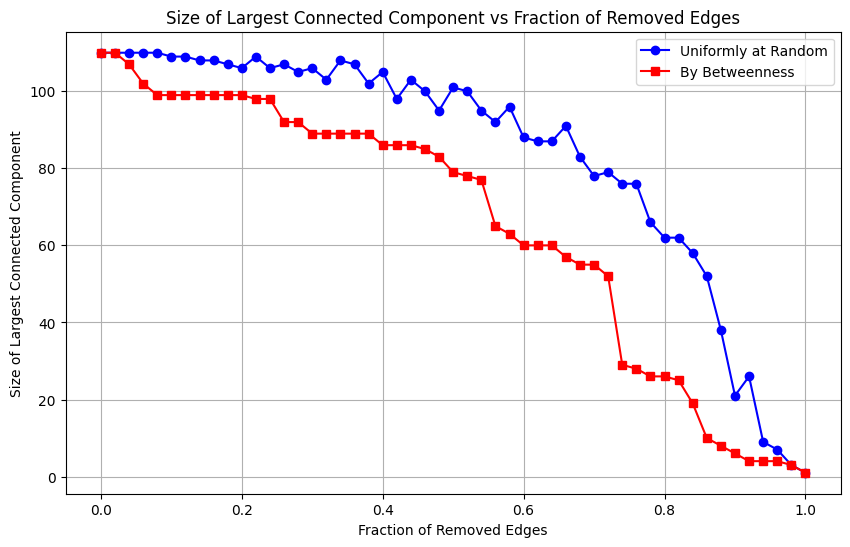

In [18]:
largest_wcc_removing_uniformly_at_random = {}
largest_wcc_removing_by_betweenness = {}

for p in np.arange(0.0, 1.02, 0.02):
    reduced_graph = remove_edges_uniformly_at_random(g, p)
    largest_wcc_removing_uniformly_at_random[p] = size_largest_connected_component(reduced_graph)

for p in np.arange(0.0, 1.02, 0.02):
    reduced_graph = remove_edges_by_betweenness(g, p)
    largest_wcc_removing_by_betweenness[p] = size_largest_connected_component(reduced_graph)

x_vals_uniform = sorted(largest_wcc_removing_uniformly_at_random.keys())
y_vals_uniform = [largest_wcc_removing_uniformly_at_random[x] for x in x_vals_uniform]

x_vals_betweenness = sorted(largest_wcc_removing_by_betweenness.keys())
y_vals_betweenness = [largest_wcc_removing_by_betweenness[x] for x in x_vals_betweenness]

plt.figure(figsize=(10, 6))
plt.plot(x_vals_uniform, y_vals_uniform, label="Uniformly at Random", color="blue", marker='o')
plt.plot(x_vals_betweenness, y_vals_betweenness, label="By Betweenness", color="red", marker='s')

plt.xlabel("Fraction of Removed Edges")
plt.ylabel("Size of Largest Connected Component")
plt.title("Size of Largest Connected Component vs Fraction of Removed Edges")

plt.legend()
plt.grid(True)
plt.show()

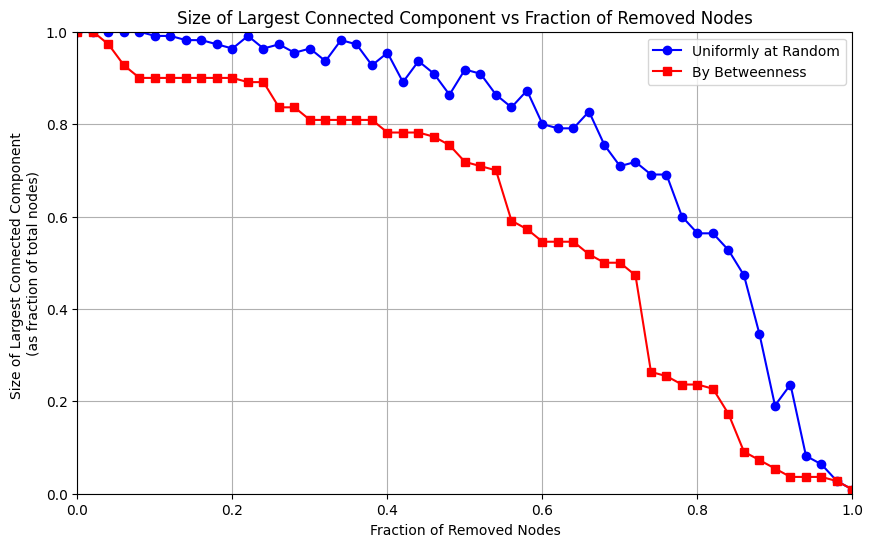

In [19]:
total_nodes = g.number_of_nodes()

x_vals_uniform = sorted(largest_wcc_removing_uniformly_at_random.keys())
y_vals_uniform = [largest_wcc_removing_uniformly_at_random[x] / total_nodes for x in x_vals_uniform]

x_vals_betweenness = sorted(largest_wcc_removing_by_betweenness.keys())
y_vals_betweenness = [largest_wcc_removing_by_betweenness[x] / total_nodes for x in x_vals_betweenness]

plt.figure(figsize=(10, 6))
plt.plot(x_vals_uniform, y_vals_uniform, label="Uniformly at Random", color="blue", marker='o')
plt.plot(x_vals_betweenness, y_vals_betweenness, label="By Betweenness", color="red", marker='s')

plt.xlabel("Fraction of Removed Nodes")
plt.ylabel("Size of Largest Connected Component \n(as fraction of total nodes)")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.title("Size of Largest Connected Component vs Fraction of Removed Nodes")

plt.legend()
plt.grid(True)
plt.show()

<font size="+1" color="red">**Brief commentary**</font>

<font color="red"> In the plot, we can see how the size of the largest connected component (LCC) decreases relative to the fraction of removed nodes, when removing nodes randomly and when removing nodes based on betweenness. In general, we notice that at the beginning, the size of the LCC remains somewhat stable, but then it drops very quickly as more nodes are removed.

<font size="+1" color="red">**(1) Approximately what percentage of edges do you need to remove at random to make the largest connected component shrink to 90% of the nodes in the graph?**</font>

<font color="red"> Around 60% of the nodes.

<font size="+1" color="red">**(2) Approximately what percentage of top edges by betweenness do you need to remove at random to make the largest connected component shrink to 90% of the nodes in the graph?**</font>

<font color="red"> Around 40% of the nodes.

<font size="+1" color="red">**(3) Why is this behaviour so different?**</font>

<font color="red">  Because removing nodes randomly tends to preserve overall connectivity for a longer period, as it doesn't specifically target critical connections. On the other hand, removing nodes by betweenness targets specifically the most important nodes in terms of network connectivity, which are the most important bridges between components.

# 5. K-core decomposition

In [20]:
# LEAVE AS-IS

def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

In [21]:
def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

def kcore_decomposition(graph):
    g = graph.copy()

    max_degree = get_max_degree(g)

    node_to_level = {}

    for level in range(1, max_degree + 1):
        while True:
            nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)

            if len(nodes_in_level) == 0:
                break

            for node in nodes_in_level:
                node_to_level[node] = level
                g.remove_node(node)

    return node_to_level

In [22]:
# LEAVE AS-IS

node_to_kcore = kcore_decomposition(g)

for character in ["JANSON", "RED TEN", "LUKE", "YODA"]:
    print("K-core of {:s}: {:d}".format(character, node_to_kcore[character]))


K-core of JANSON: 1
K-core of RED TEN: 2
K-core of LUKE: 7
K-core of YODA: 8


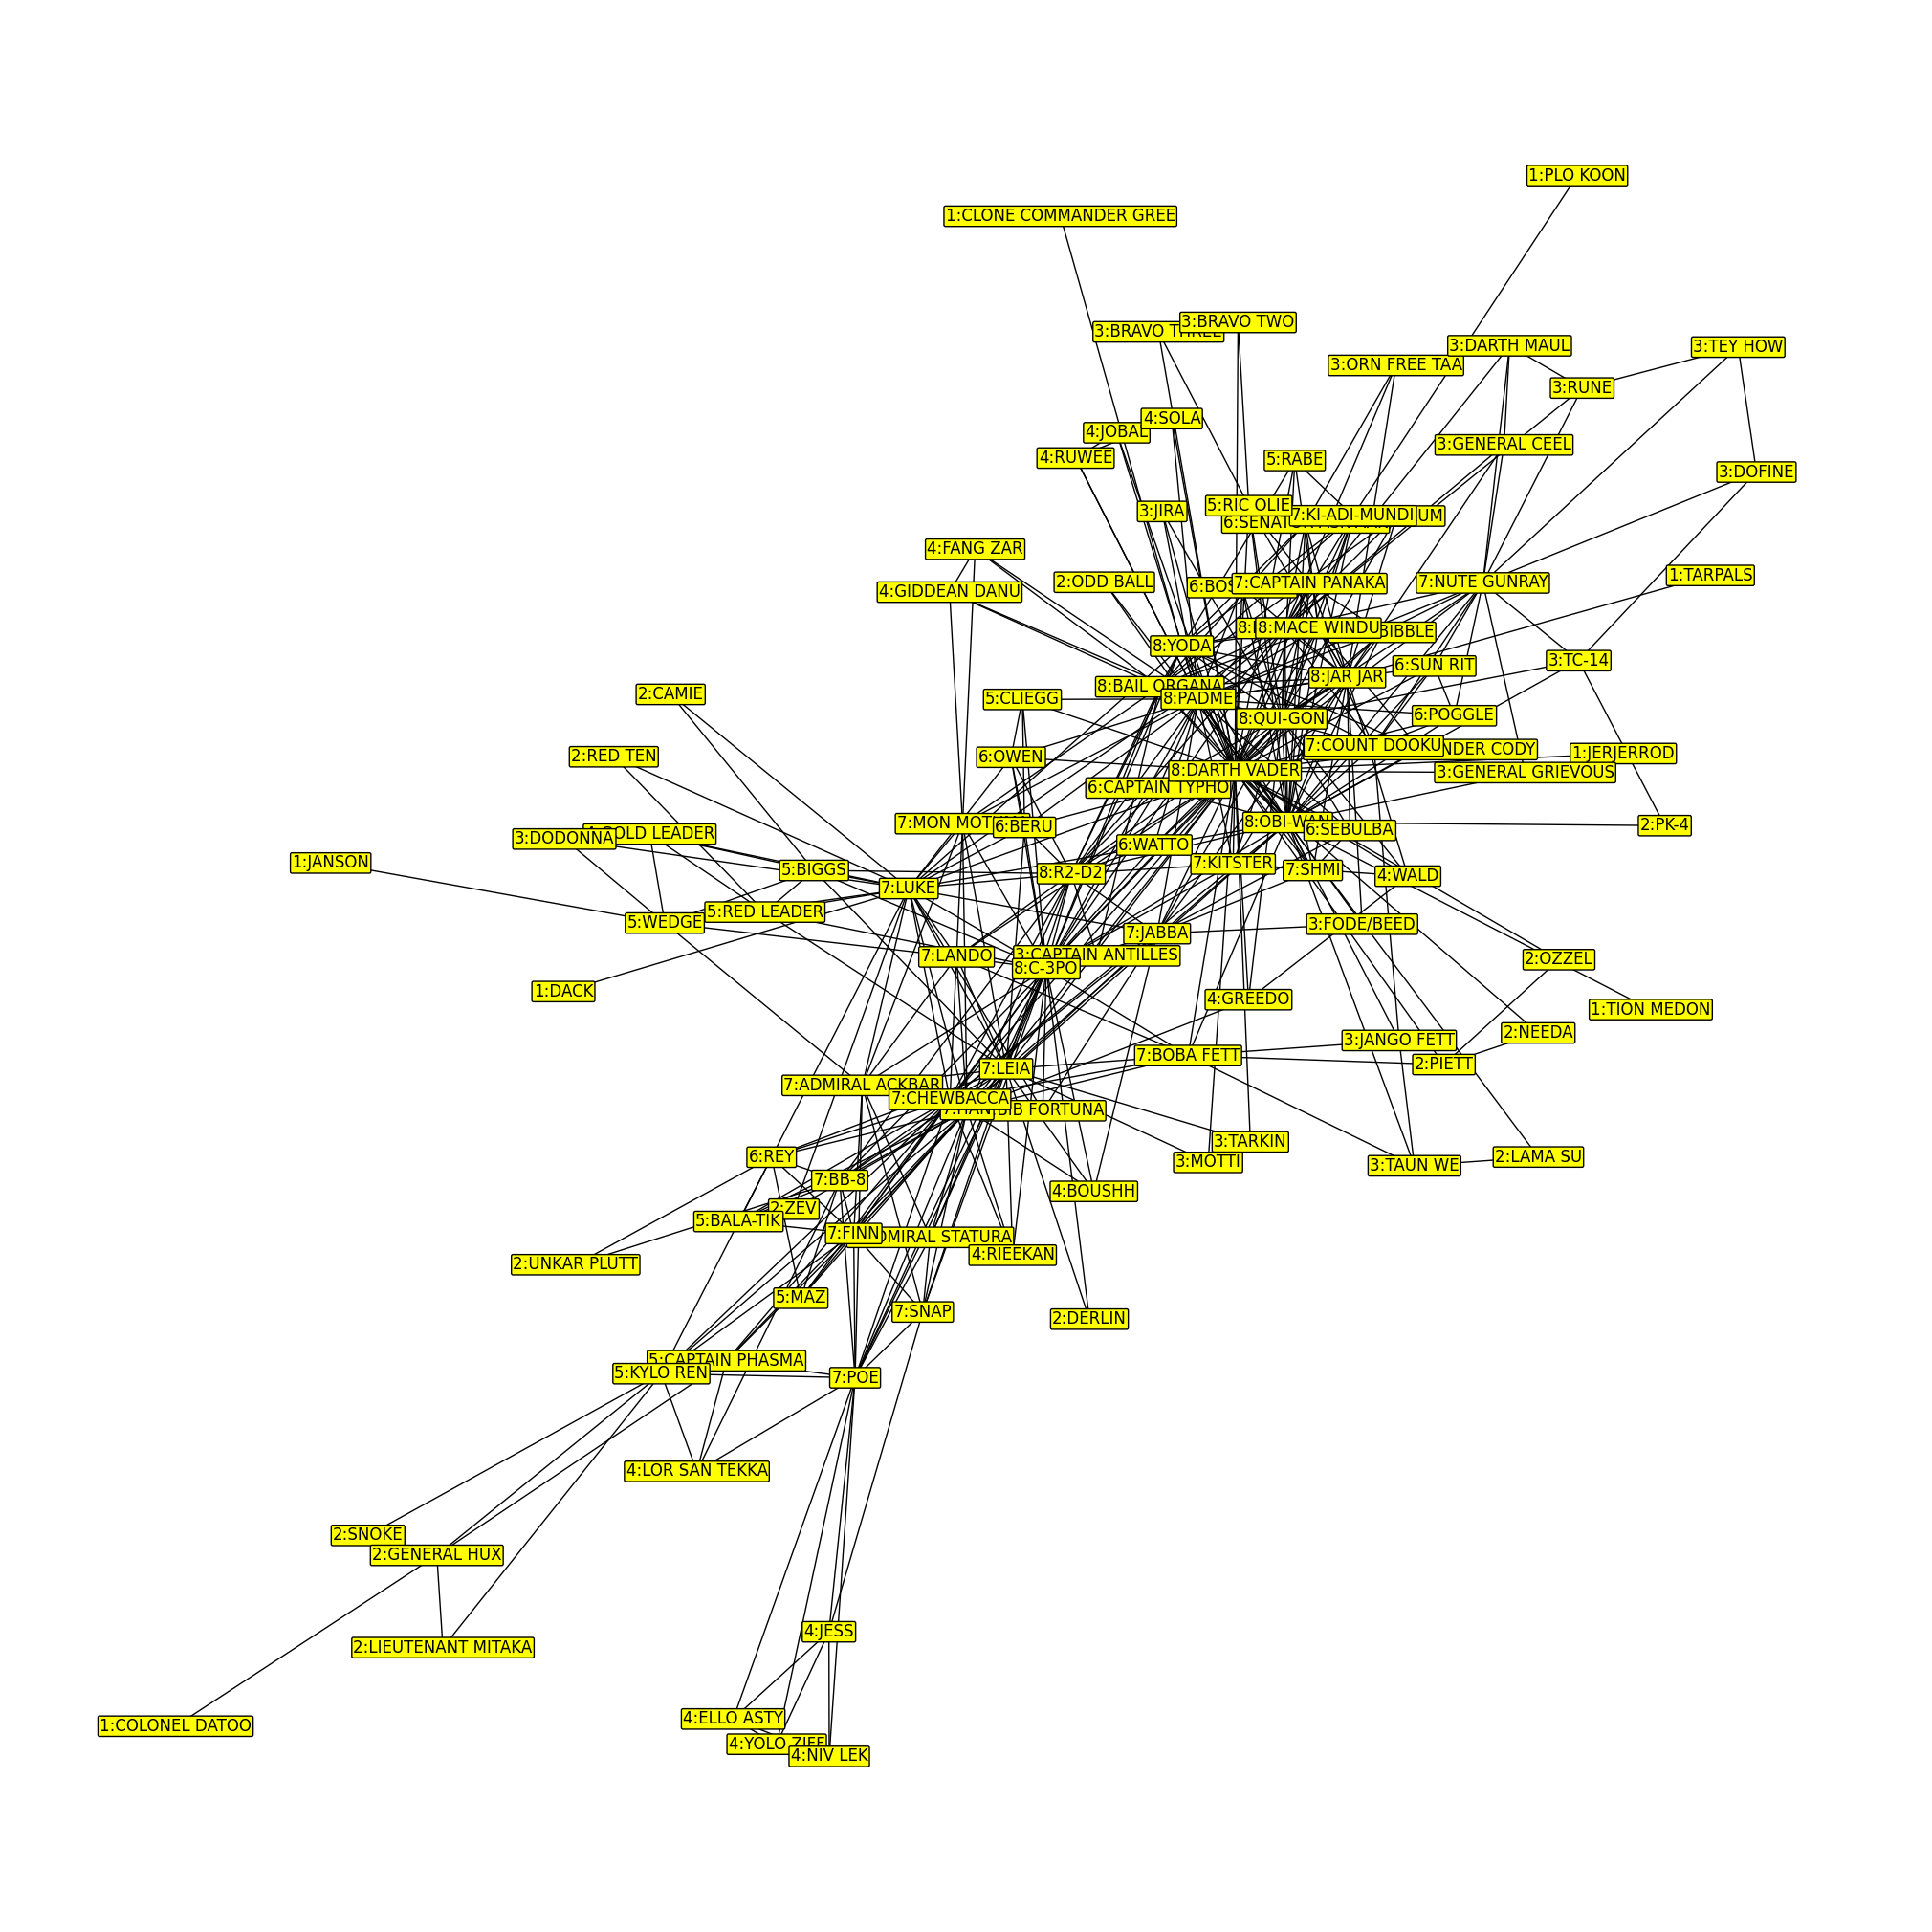

In [23]:
# LEAVE AS-IS

# Compute k-core decomposition
node_to_kcore = kcore_decomposition(g)

# Rename nodes so they include the k-core
node_to_kcore_texts = dict([(name, str(node_to_kcore[name]) + ":" + name) for name in g.nodes()])
h = nx.relabel_nodes(g, node_to_kcore_texts)

# Draw the graph
plt.figure(figsize=(20,20))
nx.draw_spring(h, with_labels=True, node_size=1, bbox=dict(facecolor="yellow", edgecolor='black', boxstyle='round,pad=0.1'))
plt.show()

<font size="+1" color="red">**Brief commentary on the graph you see and which kinds of characters can be found at different k-core levels.**</font>

<font color="red">In the graph, the nodes are labeled with their corresponding k-core level and their character name. Higher k-core values represent nodes that are part of more highly connected regions of the graph. We can find up to 8 k-core levels, the higher the value the more well known this character is. Some of the characters are the following:

<font color="red">Level 1: Plo Knoon, Dack, Clone Commander Gree... (Not really well known charachters).

<font color="red">Level 2: Piett, Camie, Red Ten...

<font color="red">Level 3: Taun We, TC-14, Darth Maul... (Some of which start to sound familiar).

<font color="red">Level 4: Boushh, Ruwee, Jess...

<font color="red">Level 5: Ric Olie, Kylo Ren... (More and more familiar).

<font color="red">Level 6: Captain Typho, Sun Rit...

<font color="red">Level 7: Leia, Luke... (Now they are really well know).

<font color="red">Level 8: Darth Vader, Obi-Wan... (These are basically so central, that everybody knows them, even people who haven't seen the movies).


# <font size="+2" color="blue">5. Multiple Experiments per Graph

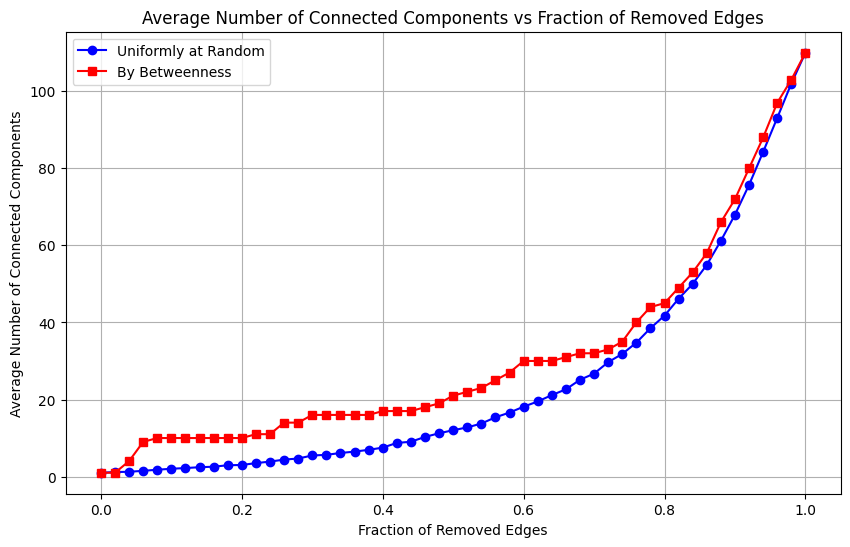

In [24]:
def average_experiments(graph, method, num_experiments=100):
    ncomponents_avg = {}
    largest_wcc_avg = {}

    for p in np.arange(0.0, 1.02, 0.02):
        ncomponents_avg[p] = []
        largest_wcc_avg[p] = []

    for _ in range(num_experiments):
        for p in np.arange(0.0, 1.02, 0.02):
            reduced_graph = method(graph, p)
            ncomponents_avg[p].append(count_connected_components(reduced_graph))
            largest_wcc_avg[p].append(size_largest_connected_component(reduced_graph))

    ncomponents_avg = {p: np.mean(values) for p, values in ncomponents_avg.items()}
    largest_wcc_avg = {p: np.mean(values) for p, values in largest_wcc_avg.items()}

    return ncomponents_avg, largest_wcc_avg

ncomponents_random_avg, largest_wcc_random_avg = average_experiments(g, remove_edges_uniformly_at_random)

ncomponents_betweenness_avg, largest_wcc_betweenness_avg = average_experiments(g, remove_edges_by_betweenness)

x_vals_random = sorted(ncomponents_random_avg.keys())
y_vals_random = [ncomponents_random_avg[x] for x in x_vals_random]

x_vals_betweenness = sorted(ncomponents_betweenness_avg.keys())
y_vals_betweenness = [ncomponents_betweenness_avg[x] for x in x_vals_betweenness]

plt.figure(figsize=(10, 6))
plt.plot(x_vals_random, y_vals_random, label="Uniformly at Random", color="blue", marker='o')
plt.plot(x_vals_betweenness, y_vals_betweenness, label="By Betweenness", color="red", marker='s')
plt.xlabel("Fraction of Removed Edges")
plt.ylabel("Average Number of Connected Components")
plt.title("Average Number of Connected Components vs Fraction of Removed Edges")
plt.legend()
plt.grid(True)
plt.show()

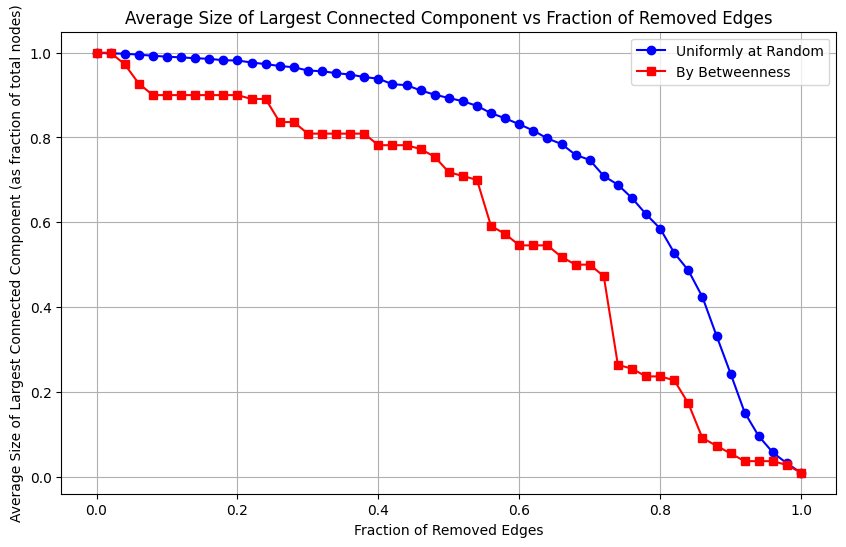

In [25]:
x_vals_random = sorted(largest_wcc_random_avg.keys())
y_vals_random = [largest_wcc_random_avg[x] / g.number_of_nodes() for x in x_vals_random]

x_vals_betweenness = sorted(largest_wcc_betweenness_avg.keys())
y_vals_betweenness = [largest_wcc_betweenness_avg[x] / g.number_of_nodes() for x in x_vals_betweenness]

plt.figure(figsize=(10, 6))
plt.plot(x_vals_random, y_vals_random, label="Uniformly at Random", color="blue", marker='o')
plt.plot(x_vals_betweenness, y_vals_betweenness, label="By Betweenness", color="red", marker='s')
plt.xlabel("Fraction of Removed Edges")
plt.ylabel("Average Size of Largest Connected Component (as fraction of total nodes)")
plt.title("Average Size of Largest Connected Component vs Fraction of Removed Edges")
plt.legend()
plt.grid(True)
plt.show()

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>